In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [208]:
data=pd.read_csv("C:/Users/himan/Desktop/zomato.csv",encoding='latin-1')

In [209]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [210]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [211]:
data.shape

(9551, 21)

In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [213]:
data['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

## Removing unrelavent columns.

In [214]:
data.drop(columns=['Restaurant ID','Is delivering now'],inplace=True)

In [215]:
data.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes'],
      dtype='object')

In [216]:
data['Country Code'].nunique()

15

In [217]:
data['Country Code'].value_counts()

1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

## `Country with code 1 having maximum data , sofor us remove other country will be help as we are removing variation of country. `

In [218]:
country = pd.read_excel("C:/Users/himan/Downloads/Country-Code.xlsx")

In [219]:
country

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [220]:
final_data = pd.merge(data,country,on='Country Code',how='left')
final_data.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [221]:
final_data.shape

(9551, 20)

In [222]:
final_data['Country'].value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [223]:
country_count = final_data['Country'].value_counts()



<AxesSubplot:>

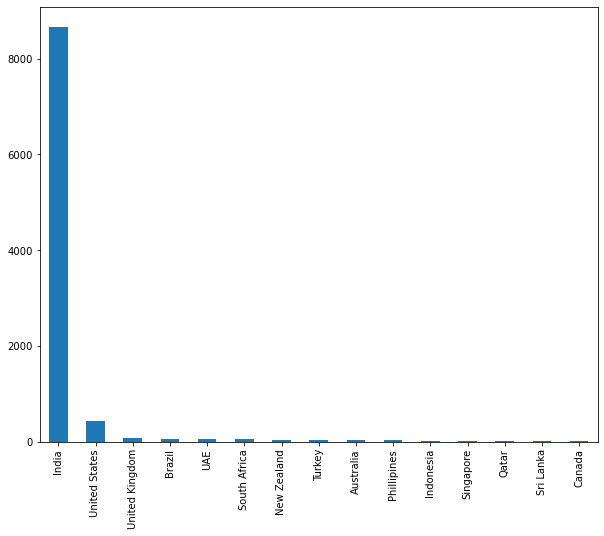

In [224]:
plt.figure(figsize=(10,8))
country_count.plot(kind='bar')

### Clearly India is the maximum user.
now we can remove other country from out data coz they will create variance in our model.

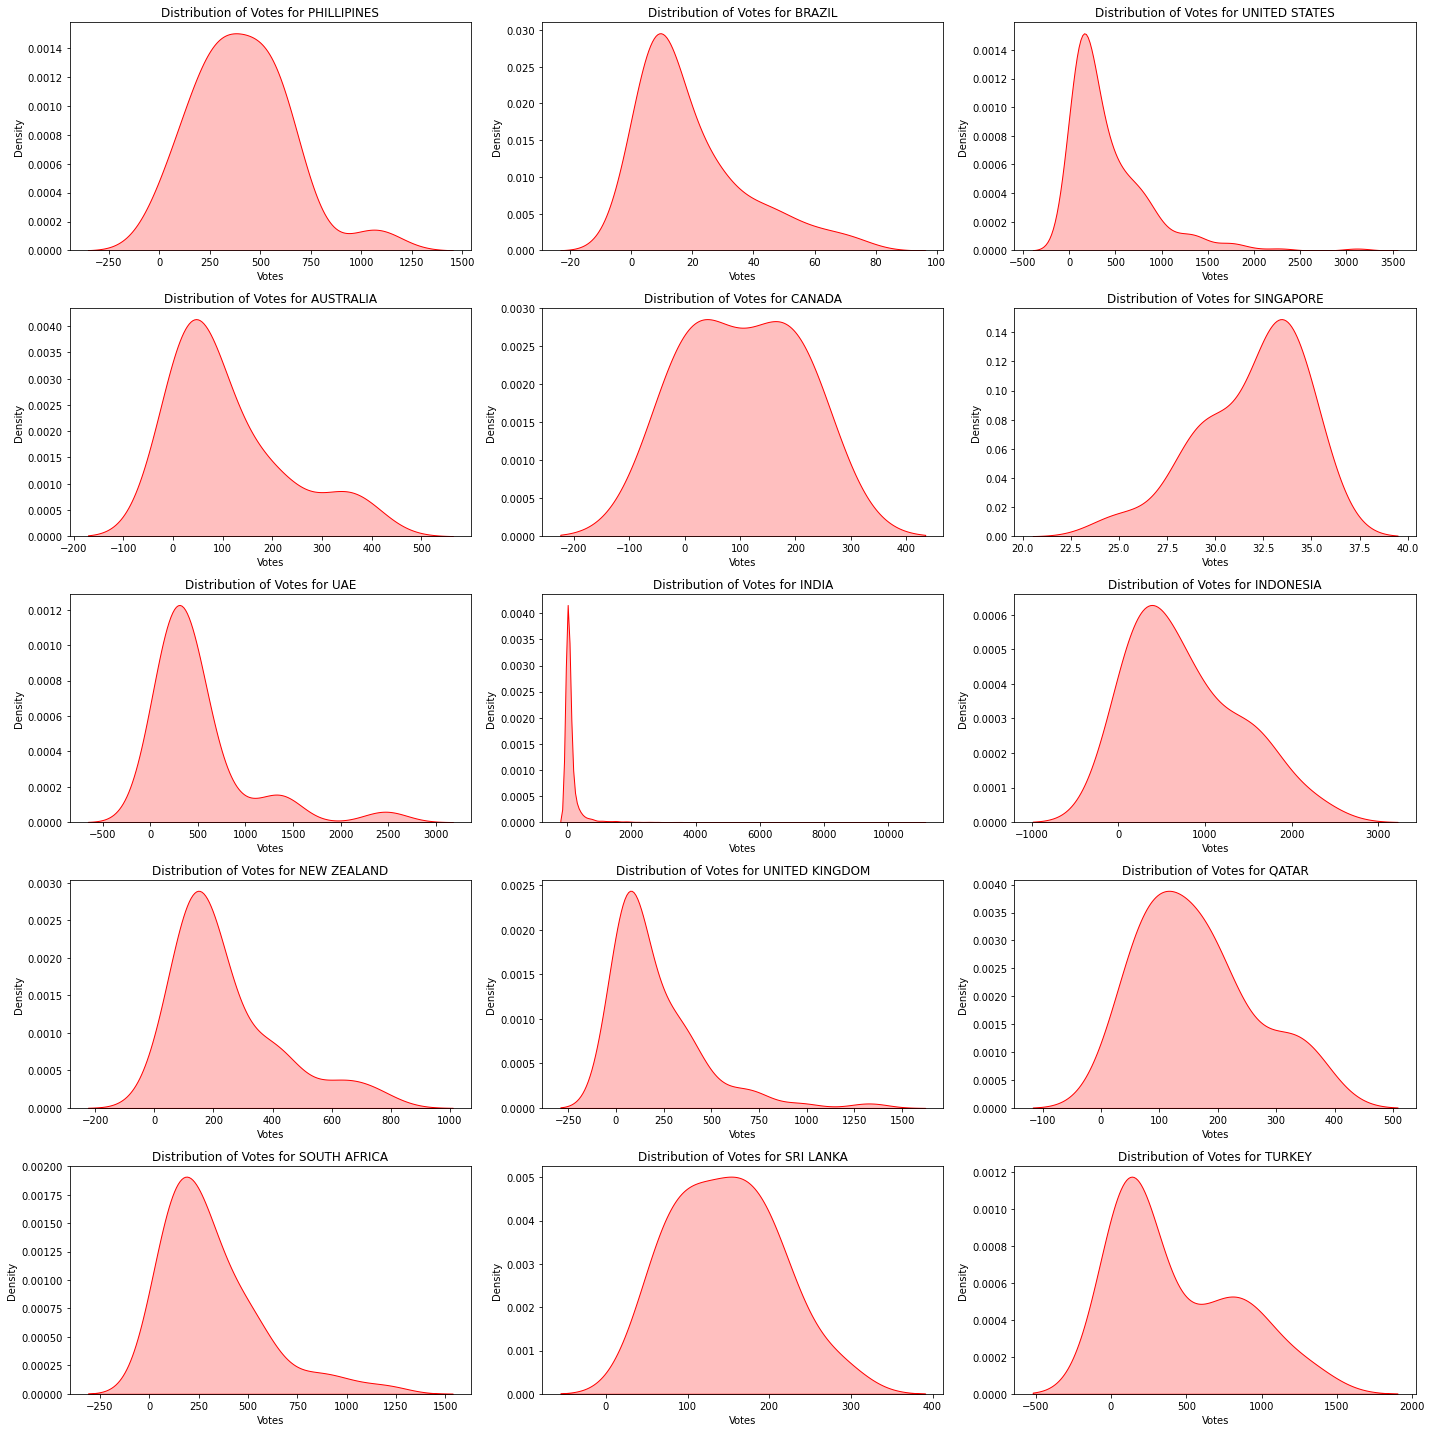

In [225]:
countries = final_data["Country"].unique()

fig, axes = plt.subplots(5, 3, figsize=(20, 20))

axes = axes.flatten()

for i, country in enumerate(countries):
    df_country = final_data[final_data["Country"] == country]
    sns.kdeplot(data = df_country["Votes"], fill = True, color = "red", ax = axes[i])
    axes[i].set_title("Distribution of Votes for {}".format(country.upper()))
    axes[i].set_xlabel("Votes")
    axes[i].set_ylabel("Density")


plt.tight_layout()
plt.show()

In [226]:
vote = final_data.groupby("Restaurant Name")["Votes"].sum().reset_index()
vote = vote.sort_values(by = "Votes")
vote = vote.tail(10)

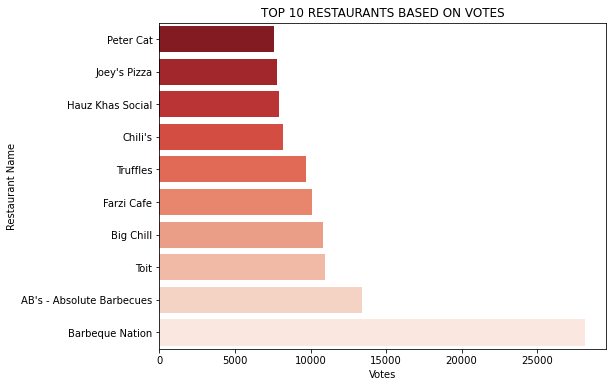

In [227]:
plt.figure(figsize = (8,6))
sns.barplot(x = "Votes", y = "Restaurant Name", data = vote, palette = "Reds_r")
plt.title("TOP 10 RESTAURANTS BASED ON VOTES")
plt.show()

In [228]:
df = final_data[data['Country Code']==1]

In [229]:
df['Country Code'].value_counts()

1    8652
Name: Country Code, dtype: int64

In [230]:
df = df.drop(columns=['Country','Currency'])

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8652 entries, 624 to 9275
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       8652 non-null   object 
 1   Country Code          8652 non-null   int64  
 2   City                  8652 non-null   object 
 3   Address               8652 non-null   object 
 4   Locality              8652 non-null   object 
 5   Locality Verbose      8652 non-null   object 
 6   Longitude             8652 non-null   float64
 7   Latitude              8652 non-null   float64
 8   Cuisines              8652 non-null   object 
 9   Average Cost for two  8652 non-null   int64  
 10  Has Table booking     8652 non-null   object 
 11  Has Online delivery   8652 non-null   object 
 12  Switch to order menu  8652 non-null   object 
 13  Price range           8652 non-null   int64  
 14  Aggregate rating      8652 non-null   float64
 15  Rating color       

<AxesSubplot:>

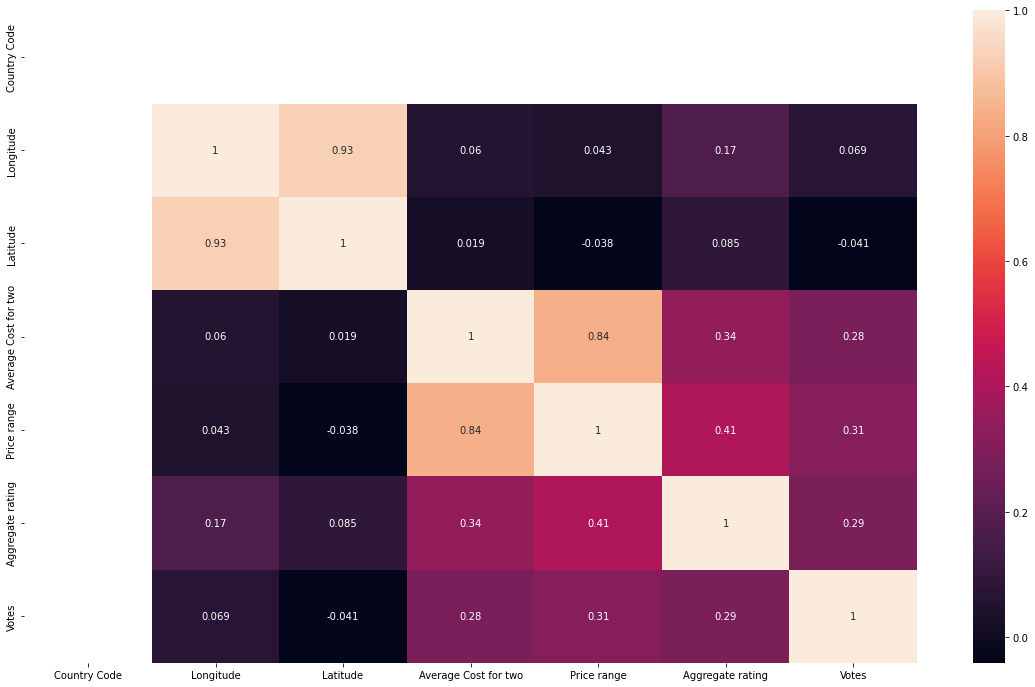

In [232]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

In [233]:
top_cities = df['City'].value_counts()[:7]

<AxesSubplot:>

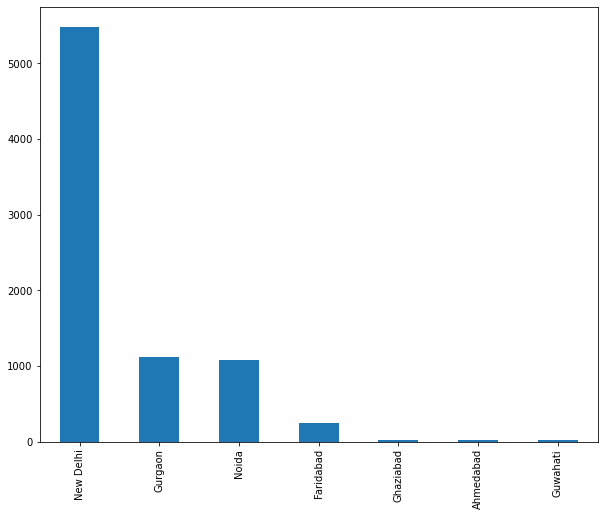

In [234]:
plt.figure(figsize=(10,8))
top_cities.plot(kind='bar')

#### New Delhi, a city in India, stands out as the top location for Zomato orders, boasting the highest number of transactions.

In [235]:
### As a majority of data is from top 4 we will drop other because of trade off

city= df['City'].isin(['New Delhi','Gurgaon','Noida'])
data = df[city]

In [236]:
data['City'].value_counts()

New Delhi    5473
Gurgaon      1118
Noida        1080
Name: City, dtype: int64

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7671 entries, 1161 to 9112
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       7671 non-null   object 
 1   Country Code          7671 non-null   int64  
 2   City                  7671 non-null   object 
 3   Address               7671 non-null   object 
 4   Locality              7671 non-null   object 
 5   Locality Verbose      7671 non-null   object 
 6   Longitude             7671 non-null   float64
 7   Latitude              7671 non-null   float64
 8   Cuisines              7671 non-null   object 
 9   Average Cost for two  7671 non-null   int64  
 10  Has Table booking     7671 non-null   object 
 11  Has Online delivery   7671 non-null   object 
 12  Switch to order menu  7671 non-null   object 
 13  Price range           7671 non-null   int64  
 14  Aggregate rating      7671 non-null   float64
 15  Rating color      

In [238]:
data['Restaurant Name'].value_counts()

Cafe Coffee Day         81
Domino's Pizza          75
Subway                  60
Green Chick Chop        47
McDonald's              44
                        ..
Sahni Chicken Corner     1
Rewari Sweets            1
Pindi's Kitchen          1
Nagi Fish Corner         1
The Grand                1
Name: Restaurant Name, Length: 5834, dtype: int64

In [239]:
## Restaurnt Name is no use we can't do anything furture.
## address also dont make sence when we have longitude latitude
## not sure what is locality verbose as I already have sufficient infomation from lang and lat i don't think i need it. 
## As we already have data about rating no use of rating text , rating color .
data.drop(columns=['Restaurant Name','Locality Verbose','Address','Rating color','Rating text','Country Code'],inplace=True)

C:\Users\himan\AppData\Local\Temp\ipykernel_34440\1969011863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Restaurant Name','Locality Verbose','Address','Rating color','Rating text','Country Code'],inplace=True)


In [240]:
data.columns

Index(['City', 'Locality', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Switch to order menu', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [241]:
data['Has Table booking'].value_counts()

No     6640
Yes    1031
Name: Has Table booking, dtype: int64

In [242]:
data['Has Online delivery'].value_counts()

No     5393
Yes    2278
Name: Has Online delivery, dtype: int64

In [243]:
data['Switch to order menu'].value_counts()
#### no use will drop it as all calues are No
data.drop(columns=['Switch to order menu'],inplace=True)

C:\Users\himan\AppData\Local\Temp\ipykernel_34440\1782255465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Switch to order menu'],inplace=True)


In [244]:
data.columns

Index(['City', 'Locality', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [245]:
data['Has Table booking'].replace('Yes',1,inplace=True)
data['Has Table booking'].replace('No',0,inplace=True)

C:\Users\himan\AppData\Local\Temp\ipykernel_34440\1798253722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Has Table booking'].replace('Yes',1,inplace=True)
C:\Users\himan\AppData\Local\Temp\ipykernel_34440\1798253722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Has Table booking'].replace('No',0,inplace=True)


In [246]:
data['Has Table booking'].value_counts()

0    6640
1    1031
Name: Has Table booking, dtype: int64

In [247]:
data['Has Online delivery'].replace('Yes',1,inplace=True)
data['Has Online delivery'].replace('No',0,inplace=True)
data['Has Online delivery'].value_counts()

C:\Users\himan\AppData\Local\Temp\ipykernel_34440\3816791710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Has Online delivery'].replace('Yes',1,inplace=True)
C:\Users\himan\AppData\Local\Temp\ipykernel_34440\3816791710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Has Online delivery'].replace('No',0,inplace=True)


0    5393
1    2278
Name: Has Online delivery, dtype: int64

In [248]:
data.columns

Index(['City', 'Locality', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7671 entries, 1161 to 9112
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  7671 non-null   object 
 1   Locality              7671 non-null   object 
 2   Longitude             7671 non-null   float64
 3   Latitude              7671 non-null   float64
 4   Cuisines              7671 non-null   object 
 5   Average Cost for two  7671 non-null   int64  
 6   Has Table booking     7671 non-null   int64  
 7   Has Online delivery   7671 non-null   int64  
 8   Price range           7671 non-null   int64  
 9   Aggregate rating      7671 non-null   float64
 10  Votes                 7671 non-null   int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 719.2+ KB


<AxesSubplot:>

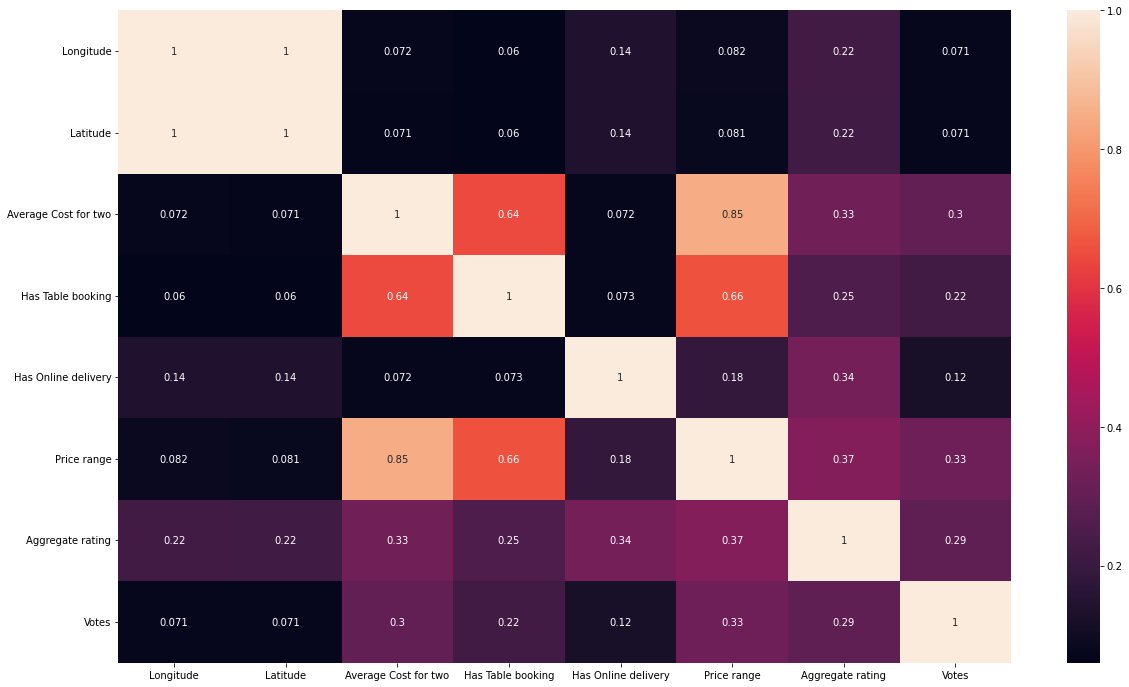

In [250]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True)

In [251]:
data.columns

Index(['City', 'Locality', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

In [252]:
data2 = data.groupby('Cuisines')['Average Cost for two'].mean().reset_index()

In [253]:
new_data = pd.merge(data,data2,on='Cuisines')

In [254]:
new_data.columns

Index(['City', 'Locality', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two_x', 'Has Table booking', 'Has Online delivery',
       'Price range', 'Aggregate rating', 'Votes', 'Average Cost for two_y'],
      dtype='object')

In [255]:
new_data.drop(columns=['Cuisines'],inplace=True)

In [256]:
new_data.rename(columns={'Average Cost for two_x':'Cost','Average Cost for two_y':'Cuisine_cost'},inplace=True)

In [257]:
new_data.head()

,City,Locality,Longitude,Latitude,Cost,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes,Cuisine_cost
0,Gurgaon,"ILD Trade Centre Mall, Sohna Road",77.039310,28.424831,350,0,0,1,3.4,16,416.666667
1,New Delhi,Mayur Vihar Phase 1,77.295725,28.606700,200,0,0,1,0.0,0,416.666667
2,New Delhi,"MGF Metropolitan Mall, Saket",77.219969,28.529876,700,0,0,2,4.1,92,416.666667
3,Gurgaon,"ILD Trade Centre Mall, Sohna Road",77.039220,28.424913,800,1,1,2,2.7,80,755.511551
4,Gurgaon,"Ambience Mall, Gurgaon",77.097118,28.503077,2000,1,1,4,4.3,1887,755.511551


In [258]:
new_data.columns

Index(['City', 'Locality', 'Longitude', 'Latitude', 'Cost',
       'Has Table booking', 'Has Online delivery', 'Price range',
       'Aggregate rating', 'Votes', 'Cuisine_cost'],
      dtype='object')

In [259]:
new_data = new_data[['City','Locality', 'Longitude', 'Latitude','Has Table booking', 'Has Online delivery',
       'Price range', 'Aggregate rating', 'Votes', 'Cuisine_cost','Cost']]

In [260]:
new_data.head()

,City,Locality,Longitude,Latitude,Has Table booking,Has Online delivery,Price range,Aggregate rating,Votes,Cuisine_cost,Cost
0,Gurgaon,"ILD Trade Centre Mall, Sohna Road",77.039310,28.424831,0,0,1,3.4,16,416.666667,350
1,New Delhi,Mayur Vihar Phase 1,77.295725,28.606700,0,0,1,0.0,0,416.666667,200
2,New Delhi,"MGF Metropolitan Mall, Saket",77.219969,28.529876,0,0,2,4.1,92,416.666667,700
3,Gurgaon,"ILD Trade Centre Mall, Sohna Road",77.039220,28.424913,1,1,2,2.7,80,755.511551,800
4,Gurgaon,"Ambience Mall, Gurgaon",77.097118,28.503077,1,1,4,4.3,1887,755.511551,2000


<AxesSubplot:>

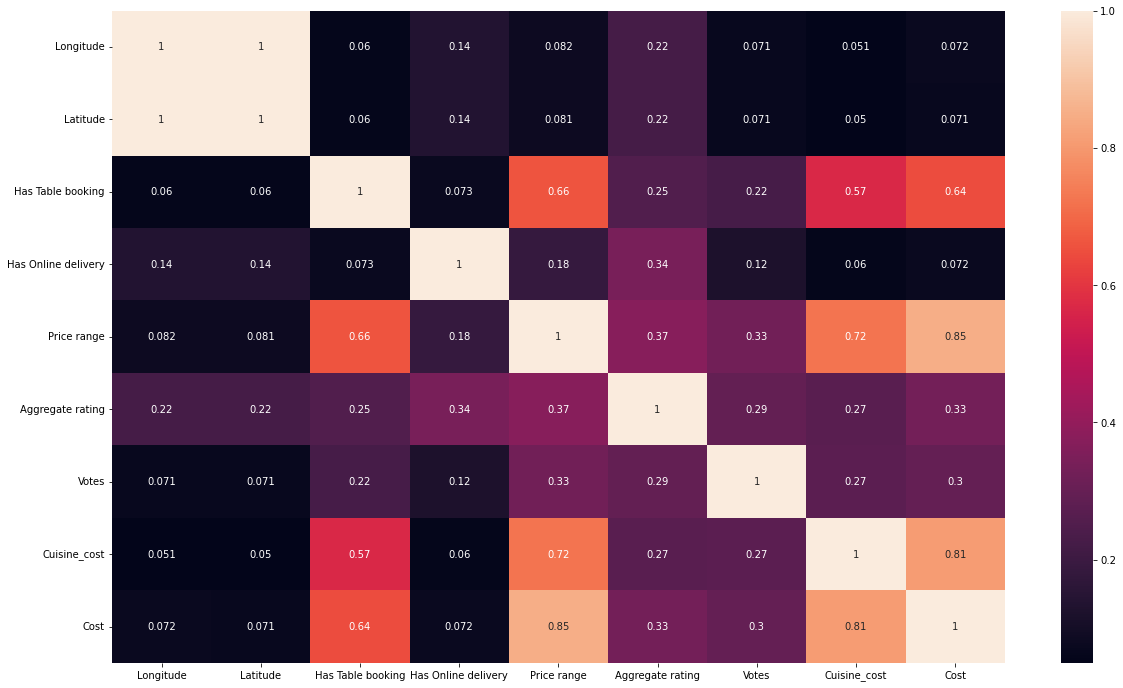

In [261]:
plt.figure(figsize=(20,12))
sns.heatmap(new_data.corr(),annot=True)

In [262]:
new_data.drop(columns=['Locality', 'Longitude', 'Latitude','Has Online delivery'],inplace=True)

In [263]:
new_data.head()

,City,Has Table booking,Price range,Aggregate rating,Votes,Cuisine_cost,Cost
0,Gurgaon,0,1,3.4,16,416.666667,350
1,New Delhi,0,1,0.0,0,416.666667,200
2,New Delhi,0,2,4.1,92,416.666667,700
3,Gurgaon,1,2,2.7,80,755.511551,800
4,Gurgaon,1,4,4.3,1887,755.511551,2000


In [264]:
X = new_data.iloc[:,:-1]
y = new_data.iloc[:,-1]

from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
X['City']=encode.fit_transform(X['City'])

In [265]:
X

,City,Has Table booking,Price range,Aggregate rating,Votes,Cuisine_cost
0,Gurgaon,0,1,3.4,16,416.666667
1,New Delhi,0,1,0.0,0,416.666667
2,New Delhi,0,2,4.1,92,416.666667
3,Gurgaon,1,2,2.7,80,755.511551
4,Gurgaon,1,4,4.3,1887,755.511551
...,...,...,...,...,...,...
7666,Noida,1,4,2.2,116,2500.000000
7667,Noida,0,1,3.0,10,200.000000
7668,Noida,0,1,3.5,105,450.000000
7669,Noida,1,3,0.0,0,1000.000000


In [266]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7671 entries, 0 to 7670
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7671 non-null   object 
 1   Has Table booking  7671 non-null   int64  
 2   Price range        7671 non-null   int64  
 3   Aggregate rating   7671 non-null   float64
 4   Votes              7671 non-null   int64  
 5   Cuisine_cost       7671 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 419.5+ KB


In [267]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=True)
cols = X.select_dtypes(include='object').columns.tolist()
hot_code = ohe.fit_transform(X[cols]).toarray()

In [268]:
d1 = pd.DataFrame(hot_code,columns=ohe.get_feature_names_out(cols))

In [269]:
d1 = d1.astype(int)

In [270]:
new_df = pd.concat([d1,X],axis=1)

In [271]:
new_df.drop(['City','City_Gurgaon'],axis=1,inplace=True)

In [272]:
new_df

,City_New Delhi,City_Noida,Has Table booking,Price range,Aggregate rating,Votes,Cuisine_cost
0,0,0,0,1,3.4,16,416.666667
1,1,0,0,1,0.0,0,416.666667
2,1,0,0,2,4.1,92,416.666667
3,0,0,1,2,2.7,80,755.511551
4,0,0,1,4,4.3,1887,755.511551
...,...,...,...,...,...,...,...
7666,0,1,1,4,2.2,116,2500.000000
7667,0,1,0,1,3.0,10,200.000000
7668,0,1,0,1,3.5,105,450.000000
7669,0,1,1,3,0.0,0,1000.000000


In [273]:
df = pd.get_dummies(new_df,columns=['Price range'])

In [274]:
df

,City_New Delhi,City_Noida,Has Table booking,Aggregate rating,Votes,Cuisine_cost,Price range_1,Price range_2,Price range_3,Price range_4
0,0,0,0,3.4,16,416.666667,1,0,0,0
1,1,0,0,0.0,0,416.666667,1,0,0,0
2,1,0,0,4.1,92,416.666667,0,1,0,0
3,0,0,1,2.7,80,755.511551,0,1,0,0
4,0,0,1,4.3,1887,755.511551,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7666,0,1,1,2.2,116,2500.000000,0,0,0,1
7667,0,1,0,3.0,10,200.000000,1,0,0,0
7668,0,1,0,3.5,105,450.000000,1,0,0,0
7669,0,1,1,0.0,0,1000.000000,0,0,1,0


In [275]:
df.columns

Index(['City_New Delhi', 'City_Noida', 'Has Table booking', 'Aggregate rating',
       'Votes', 'Cuisine_cost', 'Price range_1', 'Price range_2',
       'Price range_3', 'Price range_4'],
      dtype='object')

In [276]:
df=df[['City_New Delhi', 'City_Noida', 'Has Table booking', 'Aggregate rating',
       'Votes', 'Cuisine_cost', 'Price range_1', 'Price range_2',
       'Price range_3', 'Price range_4']]

In [277]:
df

,City_New Delhi,City_Noida,Has Table booking,Aggregate rating,Votes,Cuisine_cost,Price range_1,Price range_2,Price range_3,Price range_4
0,0,0,0,3.4,16,416.666667,1,0,0,0
1,1,0,0,0.0,0,416.666667,1,0,0,0
2,1,0,0,4.1,92,416.666667,0,1,0,0
3,0,0,1,2.7,80,755.511551,0,1,0,0
4,0,0,1,4.3,1887,755.511551,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7666,0,1,1,2.2,116,2500.000000,0,0,0,1
7667,0,1,0,3.0,10,200.000000,1,0,0,0
7668,0,1,0,3.5,105,450.000000,1,0,0,0
7669,0,1,1,0.0,0,1000.000000,0,0,1,0


In [278]:
df.columns

Index(['City_New Delhi', 'City_Noida', 'Has Table booking', 'Aggregate rating',
       'Votes', 'Cuisine_cost', 'Price range_1', 'Price range_2',
       'Price range_3', 'Price range_4'],
      dtype='object')

In [279]:
df.drop(columns=['Price range_1'],inplace=True)

In [280]:
new_data = df

In [281]:
new_data.columns

Index(['City_New Delhi', 'City_Noida', 'Has Table booking', 'Aggregate rating',
       'Votes', 'Cuisine_cost', 'Price range_2', 'Price range_3',
       'Price range_4'],
      dtype='object')

In [282]:
new_data.rename(columns={'City_New Delhi':'New Delhi','City_Noida':'Noida'},inplace=True)

In [283]:
new_data.columns

Index(['New Delhi', 'Noida', 'Has Table booking', 'Aggregate rating', 'Votes',
       'Cuisine_cost', 'Price range_2', 'Price range_3', 'Price range_4'],
      dtype='object')

In [284]:
new_data

,New Delhi,Noida,Has Table booking,Aggregate rating,Votes,Cuisine_cost,Price range_2,Price range_3,Price range_4
0,0,0,0,3.4,16,416.666667,0,0,0
1,1,0,0,0.0,0,416.666667,0,0,0
2,1,0,0,4.1,92,416.666667,1,0,0
3,0,0,1,2.7,80,755.511551,1,0,0
4,0,0,1,4.3,1887,755.511551,0,0,1
...,...,...,...,...,...,...,...,...,...
7666,0,1,1,2.2,116,2500.000000,0,0,1
7667,0,1,0,3.0,10,200.000000,0,0,0
7668,0,1,0,3.5,105,450.000000,0,0,0
7669,0,1,1,0.0,0,1000.000000,0,1,0


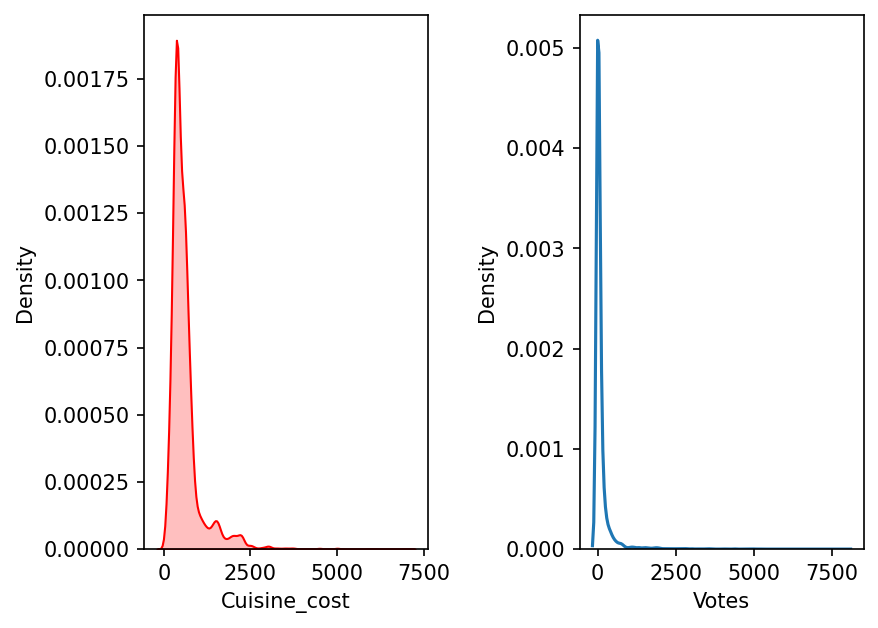

In [285]:
plt.figure(figsize=(8,8),dpi=150)


plt.subplot(2,3,2)
sns.kdeplot(new_data['Cuisine_cost'], shade=True, color='red')

plt.subplot(2,3,3)
sns.kdeplot(new_data['Votes'])
plt.tight_layout()

In [286]:
new_data

,New Delhi,Noida,Has Table booking,Aggregate rating,Votes,Cuisine_cost,Price range_2,Price range_3,Price range_4
0,0,0,0,3.4,16,416.666667,0,0,0
1,1,0,0,0.0,0,416.666667,0,0,0
2,1,0,0,4.1,92,416.666667,1,0,0
3,0,0,1,2.7,80,755.511551,1,0,0
4,0,0,1,4.3,1887,755.511551,0,0,1
...,...,...,...,...,...,...,...,...,...
7666,0,1,1,2.2,116,2500.000000,0,0,1
7667,0,1,0,3.0,10,200.000000,0,0,0
7668,0,1,0,3.5,105,450.000000,0,0,0
7669,0,1,1,0.0,0,1000.000000,0,1,0


In [287]:
X_train,X_test,y_train,y_test=train_test_split(new_data,y,train_size=0.7,random_state=42)

In [288]:
X_test.shape,y_train.shape

((2302, 9), (5369,))

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train[['Cuisine_cost','Votes']])

X_test_scaled=scaler.transform(X_test[['Cuisine_cost','Votes']])

In [289]:
new_data.drop(columns='Votes',inplace=True)

new_data_scaled = scaler.fit_transform(new_data[['Cuisine_cost','Votes']])

data=pd.DataFrame(new_data_scaled,columns=['Cuisine_cost','Votes'])


new_data.drop(columns=['Cuisine_cost','Votes'],inplace=True)

type(new_data)

new_data= pd.concat([new_data,data],axis=1)

new_data.columns

new_data = new_data[['New Delhi', 'Noida', 'Has Table booking', 'Aggregate rating',
       'Cuisine_cost', 'Votes','Cost']]

In [290]:
new_data

,New Delhi,Noida,Has Table booking,Aggregate rating,Cuisine_cost,Price range_2,Price range_3,Price range_4
0,0,0,0,3.4,416.666667,0,0,0
1,1,0,0,0.0,416.666667,0,0,0
2,1,0,0,4.1,416.666667,1,0,0
3,0,0,1,2.7,755.511551,1,0,0
4,0,0,1,4.3,755.511551,0,0,1
...,...,...,...,...,...,...,...,...
7666,0,1,1,2.2,2500.000000,0,0,1
7667,0,1,0,3.0,200.000000,0,0,0
7668,0,1,0,3.5,450.000000,0,0,0
7669,0,1,1,0.0,1000.000000,0,1,0


## Checking for the assumptions before fitting a regression model.

1. Checking for Outliers

In [291]:
new_data.shape

(7671, 8)

In [292]:
y = pd.DataFrame(y,columns=['Cost'])

In [293]:
new_data = pd.concat([new_data,y],axis=1)

In [294]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


df = remove_outliers(new_data, 'Aggregate rating')
#df = remove_outliers(new_data, 'Votes')
df = remove_outliers(new_data, 'Cuisine_cost')
df=  remove_outliers(new_data,'Cost')


In [295]:
df

,New Delhi,Noida,Has Table booking,Aggregate rating,Cuisine_cost,Price range_2,Price range_3,Price range_4,Cost
0,0,0,0,3.4,416.666667,0,0,0,350
1,1,0,0,0.0,416.666667,0,0,0,200
2,1,0,0,4.1,416.666667,1,0,0,700
3,0,0,1,2.7,755.511551,1,0,0,800
6,0,0,1,3.8,755.511551,1,0,0,700
...,...,...,...,...,...,...,...,...,...
7665,0,1,0,0.0,500.000000,1,0,0,500
7667,0,1,0,3.0,200.000000,0,0,0,200
7668,0,1,0,3.5,450.000000,0,0,0,450
7669,0,1,1,0.0,1000.000000,0,1,0,1000


c:\Users\himan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\himan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\himan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


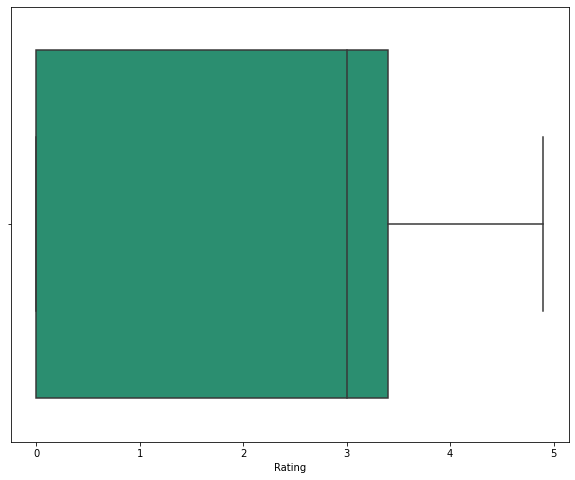

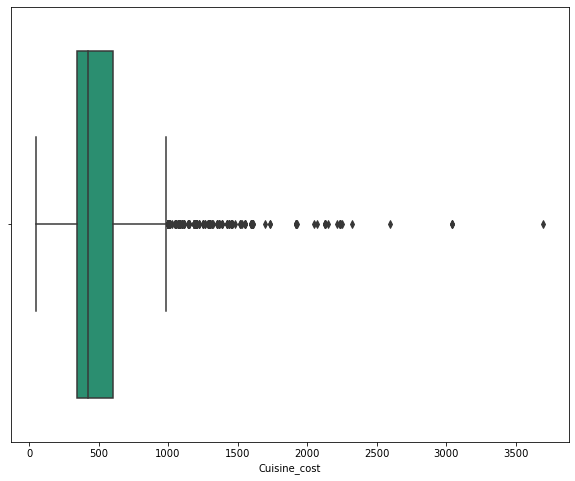

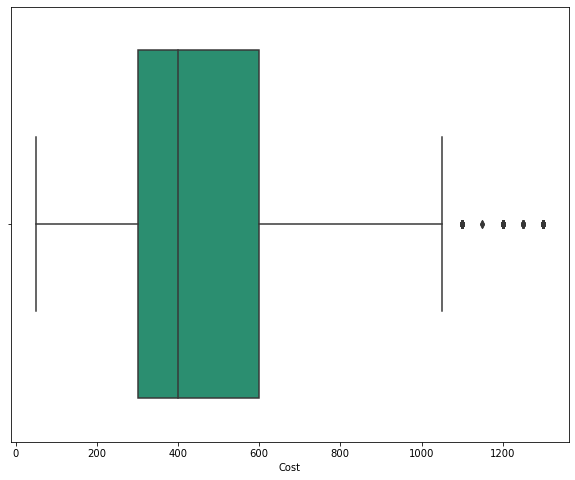

In [296]:
plt.figure(figsize=(10,8))
sns.boxplot(df['Aggregate rating'],palette='Dark2')
plt.xlabel('Rating')


plt.figure(figsize=(10,8))
sns.boxplot(df['Cuisine_cost'],palette='Dark2')
plt.xlabel('Cuisine_cost')

plt.figure(figsize=(10,8))
sns.boxplot(df['Cost'],palette='Dark2')
plt.xlabel('Cost')

plt.show()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Cuisine_cost']]=scaler.fit_transform(df[['Cuisine_cost']])

In [297]:
df['Cuisine_cost'].describe()

count    7007.000000
mean      501.641245
std       259.591932
min        50.000000
25%       342.948718
50%       424.049080
75%       605.555556
max      3700.000000
Name: Cuisine_cost, dtype: float64

In [298]:
Q1 = df['Cuisine_cost'].quantile(0.25)
Q3 = df['Cuisine_cost'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
print(lower_bound)
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)
df = df[(df['Cuisine_cost'] >= lower_bound) & (df['Cuisine_cost'] <= upper_bound)]

-50.961538461538396
999.4658119658119


In [299]:
df

,New Delhi,Noida,Has Table booking,Aggregate rating,Cuisine_cost,Price range_2,Price range_3,Price range_4,Cost
0,0,0,0,3.4,416.666667,0,0,0,350
1,1,0,0,0.0,416.666667,0,0,0,200
2,1,0,0,4.1,416.666667,1,0,0,700
3,0,0,1,2.7,755.511551,1,0,0,800
6,0,0,1,3.8,755.511551,1,0,0,700
...,...,...,...,...,...,...,...,...,...
7663,0,1,0,3.4,200.000000,0,0,0,200
7665,0,1,0,0.0,500.000000,1,0,0,500
7667,0,1,0,3.0,200.000000,0,0,0,200
7668,0,1,0,3.5,450.000000,0,0,0,450


c:\Users\himan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Cuisine_cost')

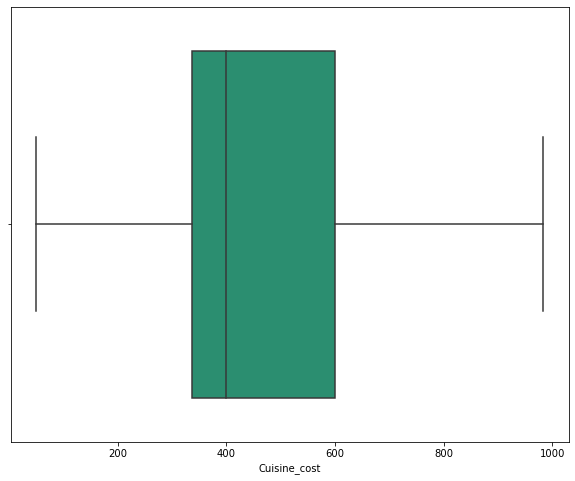

In [300]:

plt.figure(figsize=(10,8))
sns.boxplot(df['Cuisine_cost'],palette='Dark2')
plt.xlabel('Cuisine_cost')

from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],random_state=42,train_size=0.7)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

In [301]:


import scipy.stats as st


In [302]:
df.shape

(6695, 9)

c:\Users\himan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\himan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\himan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


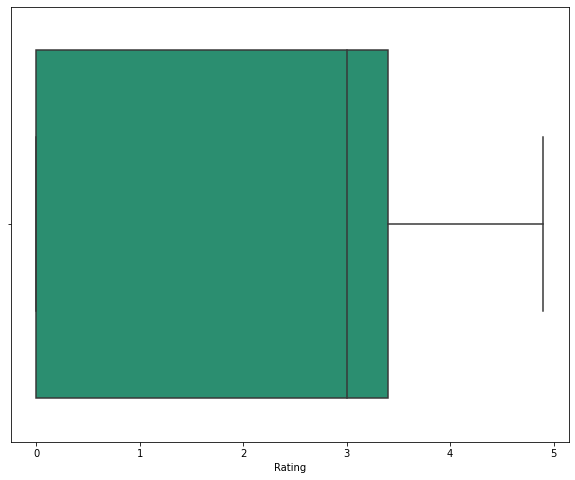

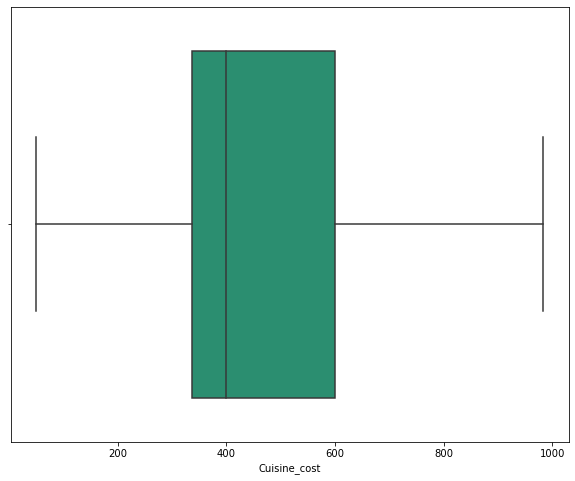

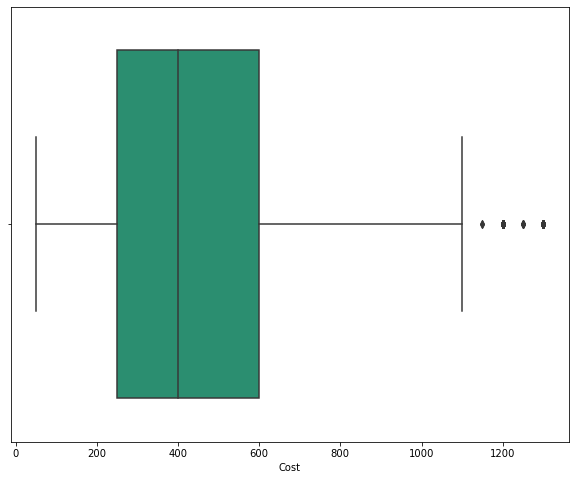

In [303]:
plt.figure(figsize=(10,8))
sns.boxplot(df['Aggregate rating'],palette='Dark2')
plt.xlabel('Rating')

plt.figure(figsize=(10,8))
sns.boxplot(df['Cuisine_cost'],palette='Dark2')
plt.xlabel('Cuisine_cost')

plt.figure(figsize=(10,8))
sns.boxplot(df['Cost'],palette='Dark2')
plt.xlabel('Cost')

plt.show()

2. Checking for the non-linearity of the response-predictor relationship.

In [304]:
df

,New Delhi,Noida,Has Table booking,Aggregate rating,Cuisine_cost,Price range_2,Price range_3,Price range_4,Cost
0,0,0,0,3.4,416.666667,0,0,0,350
1,1,0,0,0.0,416.666667,0,0,0,200
2,1,0,0,4.1,416.666667,1,0,0,700
3,0,0,1,2.7,755.511551,1,0,0,800
6,0,0,1,3.8,755.511551,1,0,0,700
...,...,...,...,...,...,...,...,...,...
7663,0,1,0,3.4,200.000000,0,0,0,200
7665,0,1,0,0.0,500.000000,1,0,0,500
7667,0,1,0,3.0,200.000000,0,0,0,200
7668,0,1,0,3.5,450.000000,0,0,0,450


In [305]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [306]:
y

0       350
1       200
2       700
3       800
6       700
       ... 
7663    200
7665    500
7667    200
7668    450
7670    450
Name: Cost, Length: 6695, dtype: int64

In [307]:
X

,New Delhi,Noida,Has Table booking,Aggregate rating,Cuisine_cost,Price range_2,Price range_3,Price range_4
0,0,0,0,3.4,416.666667,0,0,0
1,1,0,0,0.0,416.666667,0,0,0
2,1,0,0,4.1,416.666667,1,0,0
3,0,0,1,2.7,755.511551,1,0,0
6,0,0,1,3.8,755.511551,1,0,0
...,...,...,...,...,...,...,...,...
7663,0,1,0,3.4,200.000000,0,0,0
7665,0,1,0,0.0,500.000000,1,0,0
7667,0,1,0,3.0,200.000000,0,0,0
7668,0,1,0,3.5,450.000000,0,0,0


In [308]:
import statsmodels.formula.api as sm
model = sm.ols('y~X',data=df).fit()

Text(0, 0.5, 'Residuals')

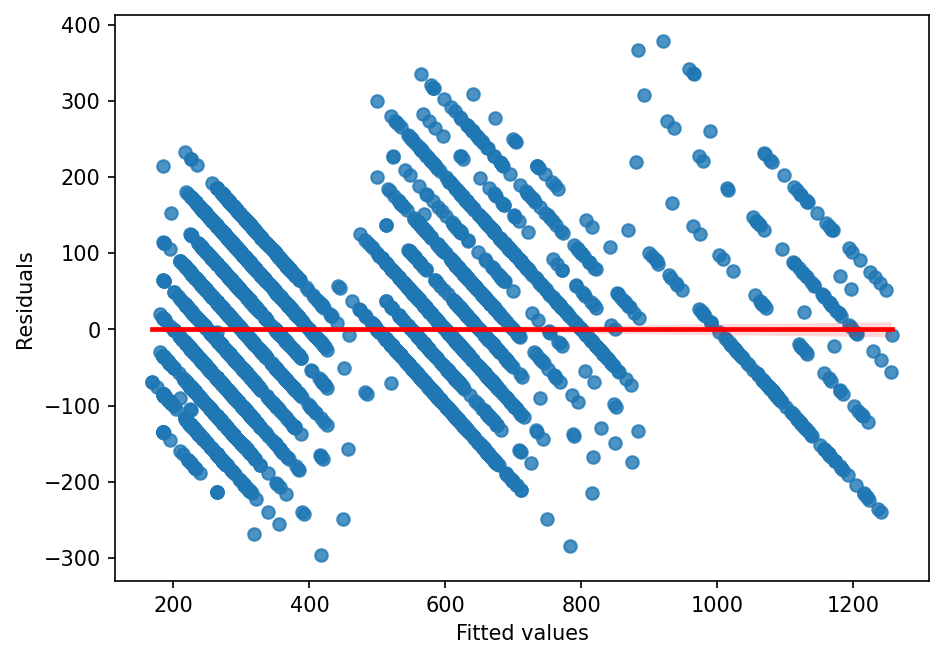

In [309]:
plt.figure(figsize=(7,5),dpi=150)
sns.regplot(x=model.predict(X),y= model.resid,line_kws = {"color": "red"})
plt.xlabel('Fitted values')
plt.ylabel("Residuals")

The presence of these diagonal bands suggests that there are systematic deviations from the linear model. This implies that the relationship between the predicted values and the actual values may not be fully captured by a linear model.

The residuals should ideally be randomly dispersed around the zero line with no discernible pattern. In this case, the structured pattern indicates potential non-linearity.

## 3. Checking for the presence of correlation between the error terms in the model.

`The Durbin-Watson (DW) statistic is a test for detecting the presence of autocorrelation (correlation of residuals) in the residuals from a statistical regression analysis. The DW statistic values range from 0 to 4:`

    A value of 2 indicates no autocorrelation.

    A value less than 2 indicates positive autocorrelation.
    
    A value greater than 2 indicates negative autocorrelation.

In [310]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(model.resid)

In [311]:
dw

1.7080704595408878

1.5 < DW < 2: Mild positive autocorrelation.
Interpretation: Your DW statistic of 1.766 suggests that there is some positive autocorrelation in your residuals, but it is not very strong. 

This means that the residuals are slightly correlated with each other.

## 4. Checking for the multicollinearity in the data

In [312]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [313]:
vif = pd.DataFrame()
vif['Variable']= X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

c:\Users\himan\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Variable,VIF
0,New Delhi,3.917264
1,Noida,1.622354
2,Has Table booking,1.404593
3,Aggregate rating,3.210366
4,Cuisine_cost,7.458317
5,Price range_2,2.386196
6,Price range_3,1.507169
7,Price range_4,NaN


 #### Moderate multicollinearity may be present, but typically not problematic.

## 5. Checking for heteroscedasticity or homoscedasticity.?




We use Breush Pagan Test for which the hypothesis is given by-

    The null hypothesis (H0): There is no evidence of heteroscedasticity.
    The alternative hypothesis: (Ha): There is evidence of heteroscedasticity

    

In [314]:
from statsmodels.stats.api import het_breuschpagan
from statsmodels.compat import lzip

names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f-p-value']

test_result = het_breuschpagan(model.resid,model.model.exog)

lzip(names,test_result)

[('Lagrange multiplier statistic', 128.2784821678485),
 ('p-value', 6.43233191538212e-24),
 ('f-value', 18.661153991749394),
 ('f-p-value', 8.32058484071364e-25)]

Conclusion

    Rejecting the null hypothesis means there is strong evidence of heteroscedasticity. 

In [315]:

# Perform the Breusch-Pagan test
test_results = het_breuschpagan(model.resid, model.model.exog)

# Extract the test statistic and p-value
p_stat = test_results[0]
p_pvalue = test_results[1]

print(f"Breusch-Pagan test statistic: {p_stat}")
print(f"Breusch-Pagan p-value: {p_pvalue}")

# Interpretation
if p_pvalue < 0.05:
    print("There is evidence of heteroscedasticity.")
else:
    print("There is no evidence of heteroscedasticity.")

Breusch-Pagan test statistic: 128.2784821678485
Breusch-Pagan p-value: 6.43233191538212e-24
There is evidence of heteroscedasticity.


##### `There is evidence of heteroscedasticity.`
       

####   Removing HeteroceBy applying the Box-Cox transformation, you address heteroscedasticity and improve the normality of residuals.

In [316]:
X

,New Delhi,Noida,Has Table booking,Aggregate rating,Cuisine_cost,Price range_2,Price range_3,Price range_4
0,0,0,0,3.4,416.666667,0,0,0
1,1,0,0,0.0,416.666667,0,0,0
2,1,0,0,4.1,416.666667,1,0,0
3,0,0,1,2.7,755.511551,1,0,0
6,0,0,1,3.8,755.511551,1,0,0
...,...,...,...,...,...,...,...,...
7663,0,1,0,3.4,200.000000,0,0,0
7665,0,1,0,0.0,500.000000,1,0,0
7667,0,1,0,3.0,200.000000,0,0,0
7668,0,1,0,3.5,450.000000,0,0,0


In [322]:
from sklearn.preprocessing import power_transform
X['Cuisine_cost']= power_transform(X[['Cuisine_cost']],method='box-cox')

In [323]:
X

,New Delhi,Noida,Has Table booking,Aggregate rating,Cuisine_cost,Price range_2,Price range_3,Price range_4
0,0,0,0,3.4,-0.171832,0,0,0
1,1,0,0,0.0,-0.171832,0,0,0
2,1,0,0,4.1,-0.171832,1,0,0
3,0,0,1,2.7,1.520593,1,0,0
6,0,0,1,3.8,1.520593,1,0,0
...,...,...,...,...,...,...,...,...
7663,0,1,0,3.4,-1.669771,0,0,0
7665,0,1,0,0.0,0.294046,1,0,0
7667,0,1,0,3.0,-1.669771,0,0,0
7668,0,1,0,3.5,0.019633,0,0,0


Box-Cox lambda value: 0.40294619663962317

In [329]:

# Fit the regression model using the transformed dependent variable

model_boxcox = sm.ols('y~X',data=df).fit()
# Print the summary of the model
print(model_boxcox.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     5192.
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        02:31:45   Log-Likelihood:                -39722.
No. Observations:                6695   AIC:                         7.946e+04
Df Residuals:                    6687   BIC:                         7.951e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    293.8190      3.672     80.025      0.0

c:\Users\himan\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


#### `Again testing heteroscedasticity`

In [330]:

# Perform the Breusch-Pagan test
test_results = het_breuschpagan(model.resid, model.model.exog)

# Extract the test statistic and p-value
p_stat = test_results[0]
p_pvalue = test_results[1]

print(f"Breusch-Pagan test statistic: {p_stat}")
print(f"Breusch-Pagan p-value: {p_pvalue}")

# Interpretation
if p_pvalue < 0.05:
    print("There is evidence of heteroscedasticity.")
else:
    print("There is no evidence of heteroscedasticity.")

Breusch-Pagan test statistic: 128.2784821678485
Breusch-Pagan p-value: 6.43233191538212e-24
There is evidence of heteroscedasticity.


## `Residuals are normal now ,achiving Homoscedasticity.`

In [332]:
import statsmodels.formula.api as sm
model = sm.ols('y~X',data=df).fit()

Text(0, 0.5, 'Residuals')

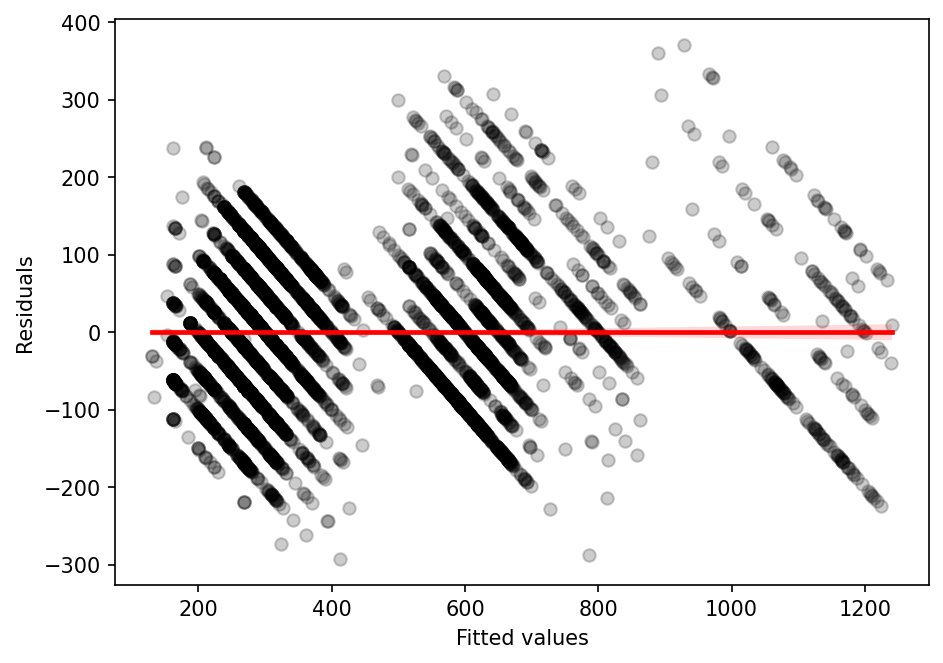

In [333]:
plt.figure(figsize=(7,5),dpi=150)
sns.regplot(x=model.predict(X),y= model.resid,line_kws = {"color": "red"},scatter_kws = {"color": "black", "alpha": 0.2})
plt.xlabel('Fitted values')
plt.ylabel("Residuals")

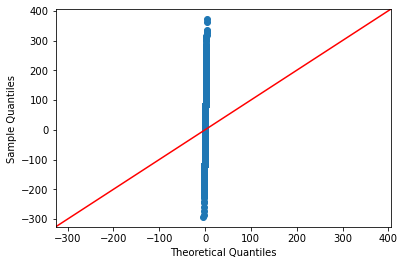

In [334]:
import statsmodels.api as sm
sm.qqplot(model.resid, line='45')
plt.show()

In [335]:
y

0       350
1       200
2       700
3       800
6       700
       ... 
7663    200
7665    500
7667    200
7668    450
7670    450
Name: Cost, Length: 6695, dtype: int64

In [336]:
X

,New Delhi,Noida,Has Table booking,Aggregate rating,Cuisine_cost,Price range_2,Price range_3,Price range_4
0,0,0,0,3.4,-0.171832,0,0,0
1,1,0,0,0.0,-0.171832,0,0,0
2,1,0,0,4.1,-0.171832,1,0,0
3,0,0,1,2.7,1.520593,1,0,0
6,0,0,1,3.8,1.520593,1,0,0
...,...,...,...,...,...,...,...,...
7663,0,1,0,3.4,-1.669771,0,0,0
7665,0,1,0,0.0,0.294046,1,0,0
7667,0,1,0,3.0,-1.669771,0,0,0
7668,0,1,0,3.5,0.019633,0,0,0


In [337]:
from sklearn.preprocessing import power_transform
X['Cuisine_cost'] = power_transform(X[['Cuisine_cost']],method='yeo-johnson')
#y_trans = power_transform(y,method='yeo-johnson',standardize=True)

In [339]:
model = sm.OLS(y, X_trans).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Cost   R-squared (uncentered):                   0.101
Model:                            OLS   Adj. R-squared (uncentered):              0.101
Method:                 Least Squares   F-statistic:                              755.2
Date:                Thu, 27 Jun 2024   Prob (F-statistic):                   1.29e-157
Time:                        02:32:35   Log-Likelihood:                         -50647.
No. Observations:                6695   AIC:                                  1.013e+05
Df Residuals:                    6694   BIC:                                  1.013e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [340]:

# Perform the Breusch-Pagan test
test_results = het_breuschpagan(model.resid, model.model.exog)

# Extract the test statistic and p-value
p_stat = test_results[0]
p_pvalue = test_results[1]

print(f"Breusch-Pagan test statistic: {p_stat}")
print(f"Breusch-Pagan p-value: {p_pvalue}")

# Interpretation
if p_pvalue < 0.05:
    print("There is evidence of heteroscedasticity.")
else:
    print("There is no evidence of heteroscedasticity.")

Breusch-Pagan test statistic: 10.631350481559638
Breusch-Pagan p-value: nan
There is no evidence of heteroscedasticity.


In [341]:
import scipy.stats as stats
print(stats.shapiro(X_trans))
print(stats.shapiro(y))

ShapiroResult(statistic=0.9793911576271057, pvalue=4.5418581455885026e-30)
ShapiroResult(statistic=0.9386981725692749, pvalue=0.0)


c:\Users\himan\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [342]:
shapiro_test = stats.shapiro(model.resid)
print("Shapiro-Wilk Test p-value for residuals:", shapiro_test[1])


Shapiro-Wilk Test p-value for residuals: 1.6929086747508115e-41


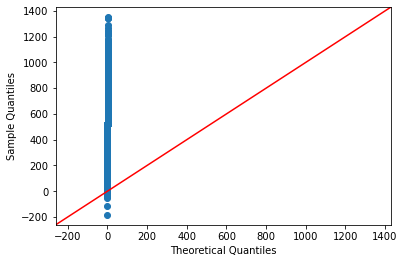

In [343]:
sm.qqplot(model.resid, line='45')
plt.show()

In [ ]:
#### our 'Cost' depandent variable not normal

In [344]:
X_trans = X

In [345]:
X_trans

,New Delhi,Noida,Has Table booking,Aggregate rating,Cuisine_cost,Price range_2,Price range_3,Price range_4
0,0,0,0,3.4,-0.169041,0,0,0
1,1,0,0,0.0,-0.169041,0,0,0
2,1,0,0,4.1,-0.169041,1,0,0
3,0,0,1,2.7,1.516861,1,0,0
6,0,0,1,3.8,1.516861,1,0,0
...,...,...,...,...,...,...,...,...
7663,0,1,0,3.4,-1.674574,0,0,0
7665,0,1,0,0.0,0.296612,1,0,0
7667,0,1,0,3.0,-1.674574,0,0,0
7668,0,1,0,3.5,0.022530,0,0,0


c:\Users\himan\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


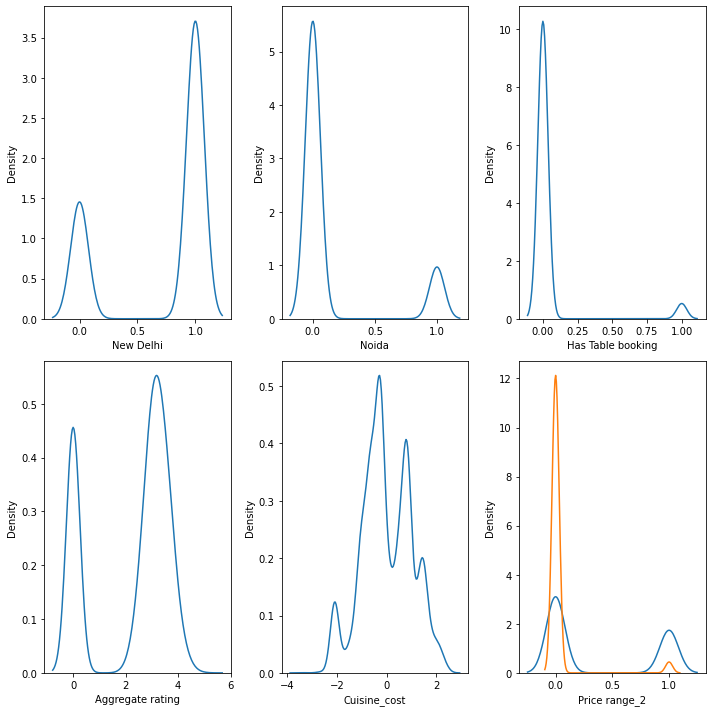

In [346]:
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
sns.kdeplot(X_trans['New Delhi'])

plt.subplot(2,3,2)
sns.kdeplot(X_trans['Noida'])


plt.subplot(2,3,3)
sns.kdeplot(X_trans['Has Table booking'])


plt.subplot(2,3,4)
sns.kdeplot(X_trans['Aggregate rating'])


plt.subplot(2,3,5)
sns.kdeplot(X_trans['Cuisine_cost'])


plt.subplot(2,3,6)
sns.kdeplot(X_trans['Price range_2'])


plt.subplot(2,3,6)
sns.kdeplot(X_trans['Price range_3'])



plt.subplot(2,3,6)
sns.kdeplot(X_trans['Price range_4'])

plt.tight_layout()

## Here we clearly can't use Linear model as our data not following assumtions.


In [347]:
X_train,X_test,y_train,y_test = train_test_split(X_trans,y,train_size=0.7,random_state=42)

In [348]:
X_train.shape,X_test.shape

((4686, 8), (2009, 8))

In [352]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,accuracy_score,mean_squared_error

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)
r2 = r2_score(y_pred,y_test)
r22 = r2_score(y_train_pred,y_train)
print(r2)
print(r22)


0.8113819863296847
0.8186262412110028


In [353]:
lasso= Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

y_pred = lasso.predict(X_test)
y_train_pred = lasso.predict(X_train)
r2 = r2_score(y_pred,y_test)
r22 = r2_score(y_train_pred,y_train)
print(r2)
print(r22)

0.8105279320476652
0.817751909774743


In [354]:
ridge=Ridge()
ridge.fit(X_train,y_train)


y_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)
r2 = r2_score(y_pred,y_test)
r22 = r2_score(y_train_pred,y_train)
print(r2)
print(r22)

0.8106400622738597
0.8178274671297286


In [355]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Create a Ridge regressor
ridge = Ridge()

# Define the parameter grid
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Perform GridSearchCV
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

# Get the best parameters and the best model
best_params_ridge = grid_search_ridge.best_params_
best_model_ridge = grid_search_ridge.best_estimator_

print(f"Best Parameters (Ridge): {best_params_ridge}")

# Evaluate the best model on the test set
y_pred_ridge = best_model_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error on Test Set (Ridge): {mse_ridge}")
r2 = r2_score(y_test, y_pred_ridge)
print(f"r2 score on Test Set (Random Forest): {r2}")

Best Parameters (Ridge): {'alpha': 0.1, 'solver': 'sparse_cg'}
Mean Squared Error on Test Set (Ridge): 8409.602774592426
r2 score on Test Set (Random Forest): 0.8401261936105748


In [356]:
from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(X_train,y_train)


y_pred = xg.predict(X_test)
y_train_pred = xg.predict(X_train)
r2 = r2_score(y_pred,y_test)
r22 = r2_score(y_train_pred,y_train)
print(r2)
print(r22)

0.8248137618536933
0.9067635008715796


In [357]:
from sklearn.neighbors import KNeighborsRegressor
Knn = KNeighborsRegressor(n_neighbors=5)
Knn.fit(X_train,y_train)
y_pred = Knn.predict(X_test)


y_train_pred = Knn.predict(X_train)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")
r2 = r2_score(y_pred,y_test)
r22 = r2_score(y_train_pred,y_train)
print(r2)
print(r22)

Mean Squared Error on Test Set: 9214.556495769039
0.7988135351947803
0.8574614625448811


In [ ]:
param_grid = {
'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
'weights': ['uniform', 'distance'],
'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
'leaf_size': [20, 30, 40, 50],
'p': [1, 2]
}

grid_search = GridSearchCV(Knn,param_grid=param_grid,cv=5,scoring='r2')
grid_search.fit(X_train,y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")
r2 = r2_score(y_test, y_pred)
y_train_pred =best_model.predict(X_train)
print(f'r2_score :', {r2})

Mean Squared Error on Test Set: 8974.640647697606
r2_score : {0.8293843360045967}


In [ ]:
r22 = r2_score(y_train_pred,y_train)
print(r22)

0.8534497706815874


In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

y_pred = tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")
r2 = r2_score(y_test, y_pred)
y_train_pred =tree.predict(X_train)
print(f'r2_score :', {r2})
r22 = r2_score(y_train_pred,y_train)
print(r22)

Mean Squared Error on Test Set: 10068.397608795593
r2_score : {0.8085910722414174}
0.9299887720953646


In [ ]:
dt = DecisionTreeRegressor()

# Define the grid of parameters to search over
param_grid = {
    'criterion': ['mse', 'mae'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit GridSearchCV object on training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (MSE): {:.2f}".format(grid_search.best_score_))

# Evaluate model performance on test data
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

# Calculate metrics on test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error on test set: {:.2f}".format(mse))
print("R^2 score on test set: {:.2f}".format(r2))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation score (MSE): 0.86
Mean Squared Error on test set: 7819.19
R^2 score on test set: 0.85


c:\Users\himan\anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regg = RandomForestRegressor()
regg.fit(X_train,y_train)

y_pred = regg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")
r2 = r2_score(y_test, y_pred)
y_train_pred =regg.predict(X_train)
print(f'r2_score :', {r2})
r22 = r2_score(y_train_pred,y_train)
print(r22)

Mean Squared Error on Test Set: 8263.210628915705
r2_score : {0.842909234639048}
0.9199215503678139


In [ ]:


# Create a RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, scoring='r2')
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and the best model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

print(f"Best Parameters (Random Forest): {best_params_rf}")

# Evaluate the best model on the test set
y_pred_rf = best_model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Mean Squared Error on Test Set (Random Forest): {mse_rf}")
r2 = r2_score(y_test, y_pred_rf)
print(f"r2 score on Test Set (Random Forest): {r2}")

Best Parameters (Random Forest): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Mean Squared Error on Test Set (Random Forest): 7389.032724843804
r2 score on Test Set (Random Forest): 0.8595281110273301


In [ ]:
from sklearn.ensemble import VotingRegressor
# Fit the voting regressor on the training data
voting_regressor_tuned = VotingRegressor(estimators=[
    ('Decision ', best_random_forest),
    ('ridge', best_ridge),
    ('xgboost', best_xgboost)
])
voting_regressor_tuned.fit(X_train, y_train)

# Evaluate the voting regressor on the test set
y_pred_tuned = voting_regressor_tuned.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
print(f"Mean Squared Error on Test Set (Tuned Voting Regressor): {mse_tuned}")
r2 = r2_score(y_test, y_pred_tuned)
print(r2)

Mean Squared Error on Test Set (Tuned Voting Regressor): 7442.078424953641
0.8585196664888111
